# Query Prediction

In [1]:
import os
import pandas as pd
import seaborn as sns

os.chdir(os.path.expanduser('~/.deeppavlov/downloads/query_prediction'))
os.listdir()

['valid.csv', 'train.csv', 'test.csv']

In [2]:
train_df = pd.read_csv('train.csv')
valid_df = pd.read_csv('valid.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.head()

,Question,Class
0,"""What periodical literature does Delta Air Lin...",7
1,"""Who is the child of Ranavalona I's husband?""",7
2,"""What is the pre-requisite of phase matter of ...",7
3,"""Which is the operating income for Qantas?""",7
4,"""What is the complete list of records released...",7


In [4]:
train_df.shape

(18536, 2)

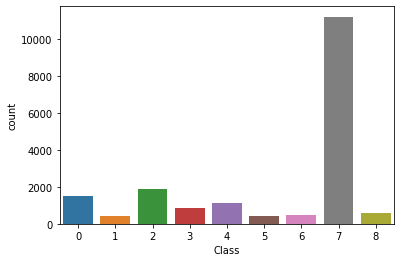

In [5]:
sns.countplot(train_df['Class'])

In [6]:
valid_df.shape

(4656, 2)

In [7]:
valid_df

,Question,Class
0,"""Who is the country for head of state of Mahmo...",7
1,"""What was the population of Somalia in 2009-0-0?""",0
2,"""Which female actress is the voice over on Sou...",7
3,"""What is nominated for of Dolores del Río that...",3
4,"""What was the population of Clermont-Ferrand o...",0
...,...,...
4651,"""Who is scriptwriter of bibliography of Natja ...",7
4652,"""Who did Alfred Kinsey divorce in 1956?""",0
4653,"""For what work did Bernard DeVoto receive the ...",2
4654,"""What is antonym of of spore print color of Pl...",7


In [8]:
combined_df = train_df.append(valid_df, ignore_index=True)
combined_df.shape

(23192, 2)

In [9]:
combined_df.duplicated().value_counts()

False    22875
True       317
dtype: int64

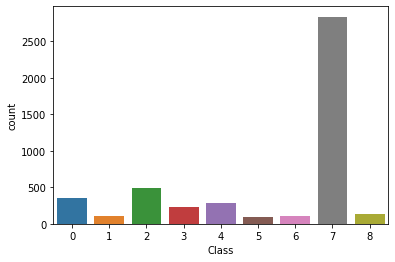

In [10]:
sns.countplot(valid_df['Class'])

In [11]:
test_df.shape

(4656, 2)

In [12]:
test_df

,Question,Class
0,"""Who is the country for head of state of Mahmo...",7
1,"""What was the population of Somalia in 2009-0-0?""",0
2,"""Which female actress is the voice over on Sou...",7
3,"""What is nominated for of Dolores del Río that...",3
4,"""What was the population of Clermont-Ferrand o...",0
...,...,...
4651,"""Who is scriptwriter of bibliography of Natja ...",7
4652,"""Who did Alfred Kinsey divorce in 1956?""",0
4653,"""For what work did Bernard DeVoto receive the ...",2
4654,"""What is antonym of of spore print color of Pl...",7


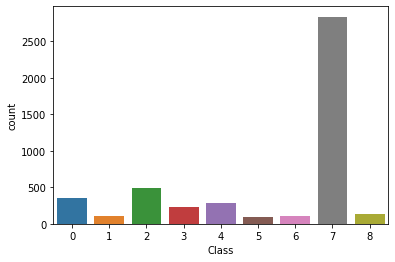

In [13]:
sns.countplot(test_df['Class'])

# LCQUAD

In [14]:
os.chdir("../lcquad")
os.listdir()

['entity_and_type_detection_BIO.pickle',
 'entity_detection_dataset.pickle',
 'entity_and_type_detection.pickle']

In [15]:
import pickle

with open('entity_and_type_detection_BIO.pickle', 'rb') as f:
    content = pickle.load(f)
    
for k, v in content.items():
    print(f"{k}: {len(v)}")

train: 13924
valid: 2273
test: 2273


# Rel ranking

In [16]:
os.chdir("../rel_ranking_bert")
os.listdir()

['paraphrases.xml',
 'rel_ranking_bert_minus_1.tar.gz',
 'paraphrases_gold.xml',
 'old']

In [17]:
import sys
sys.path += [os.path.expanduser('~/DeepPavlov')]

In [18]:
from deeppavlov.dataset_readers.paraphraser_reader import ParaphraserReader

[nltk_data] Downloading package punkt to /home/anton/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/anton/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/anton/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/anton/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


In [19]:
reader = ParaphraserReader()
data = reader.read(data_path='.', do_lower_case=False)

(ParaphraserReader._build_data)paraphrase: {}
(ParaphraserReader._build_data)paraphrase.find('value[@name="class"]'): <Element 'value' at 0x7fc6a49e47d0>
(ParaphraserReader._build_data)paraphrase.find('value[@name="class"]').text: -1


In [20]:
for k, v in data.items():
    print(f"{k}: {len(v)}")

train: 378344
valid: 0
test: 95196


In [21]:
data_pd = {}
for k, v in data.items():
    if len(v) > 0:
        texts, classes = zip(*v)
        data_pd[k] = pd.DataFrame({'texts': texts, 'class': classes})

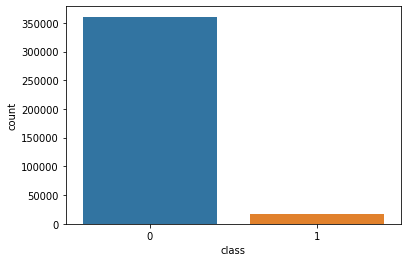

In [22]:
sns.countplot(data_pd['train']['class'])

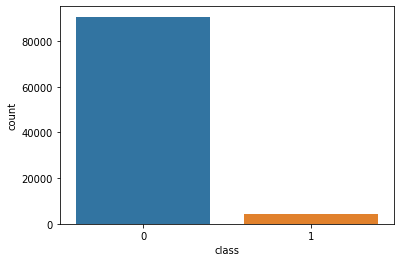

In [23]:
sns.countplot(data_pd['test']['class'])

In [24]:
pd.set_option('display.max_colwidth', -1)
data_pd['test']

,texts,class
0,"(Who is the country for head of state of Mahmoud Abbas, head of state)",1
1,"(Who is the country for head of state of Mahmoud Abbas, radix [SEP] month of the year)",0
2,"(Who is the country for head of state of Mahmoud Abbas, has natural reservoir [SEP] sports league level)",0
3,"(Who is the country for head of state of Mahmoud Abbas, time of spacecraft launch [SEP] manifestation of)",0
4,"(Who is the country for head of state of Mahmoud Abbas, allegiance [SEP] quantity symbol)",0
...,...,...
95191,"(What Theoi Project ID does Manticore has?, cause of destruction [SEP] has quality)",0
95192,"(What Theoi Project ID does Manticore has?, periapsis date [SEP] width)",0
95193,"(What Theoi Project ID does Manticore has?, Roman nomen gentilicium [SEP] rotation period)",0
95194,"(What Theoi Project ID does Manticore has?, unit symbol [SEP] direction)",0


In [25]:
data_pd['test'].loc[1, "texts"]

('Who is the country for head of state of Mahmoud Abbas',
 'radix [SEP] month of the year')

# Check f1_score

In [31]:
from sklearn.metrics import f1_score, precision_score, recall_score

y_true = [0, 0, 1, 1, 1, 1, 1, 1, 1]
y_pred = [0, 1, 1, 1, 1, 1, 1, 1, 1]

# print("recall:", recall_score(y_true, y_pred))
# print("precision:", precision_score(y_true, y_pred))
print("f1:", f1_score(y_true, y_pred))

y_true = [str(yy) for yy in y_true]
y_pred = [str(yy) for yy in y_pred]

# print("recall:", recall_score(y_true, y_pred))
# print("precision:", precision_score(y_true, y_pred))
# print("f1:", f1_score(y_true, y_pred))

y_true = [0, 0, 1, 2, 2, 2, 2, 2, 2, 2]
y_pred = [0, 1, 1, 2, 2, 2, 2, 2, 2, 2]

print()
print("f1:", f1_score(y_true, y_pred, average='macro'))

y_true = [str(yy) for yy in y_true]
y_pred = [str(yy) for yy in y_pred]

print()
print("f1:", f1_score(y_true, y_pred, average='macro'))

f1: 0.9333333333333333

f1: 0.7777777777777777

f1: 0.7777777777777777


In [30]:
from collections import Counter

print(dict(Counter([1, 2, 3, 4])))

{1: 1, 2: 1, 3: 1, 4: 1}
